In [27]:
!pip install --upgrade gensim
from gensim.models import Word2Vec
import pandas as pd
import nltk
nltk.download('punkt')
import numpy as np
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/alice/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
text="Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension.The use of multi-sense embeddings is known to improve performance in several NLP tasks, such as part-of-speech tagging, semantic relation identification, and semantic relatedness. However, tasks involving named entity recognition and sentiment analysis seem not to benefit from a multiple vector representation."

In [3]:
text=re.sub(r"[^.A-Za-z]",' ',text)
sentence=text.split('.')
tokens=[nltk.word_tokenize(words) for words in sentence]
tokens

[['Word',
  'embedding',
  'is',
  'the',
  'collective',
  'name',
  'for',
  'a',
  'set',
  'of',
  'language',
  'modeling',
  'and',
  'feature',
  'learning',
  'techniques',
  'in',
  'natural',
  'language',
  'processing',
  'where',
  'words',
  'or',
  'phrases',
  'from',
  'the',
  'vocabulary',
  'are',
  'mapped',
  'to',
  'vectors',
  'of',
  'real',
  'numbers'],
 ['Conceptually',
  'it',
  'involves',
  'a',
  'mathematical',
  'embedding',
  'from',
  'a',
  'space',
  'with',
  'many',
  'dimensions',
  'per',
  'word',
  'to',
  'a',
  'continuous',
  'vector',
  'space',
  'with',
  'a',
  'much',
  'lower',
  'dimension'],
 ['The',
  'use',
  'of',
  'multi',
  'sense',
  'embeddings',
  'is',
  'known',
  'to',
  'improve',
  'performance',
  'in',
  'several',
  'NLP',
  'tasks',
  'such',
  'as',
  'part',
  'of',
  'speech',
  'tagging',
  'semantic',
  'relation',
  'identification',
  'and',
  'semantic',
  'relatedness'],
 ['However',
  'tasks',
  'involv

In [15]:
model = Word2Vec(tokens,vector_size=50,sg=1,min_count=1)
model.wv['the']

array([-0.01680901,  0.01848656, -0.00071057, -0.00347135,  0.00905258,
       -0.00818117,  0.00580353,  0.01417864,  0.0119911 , -0.01499313,
        0.01878768,  0.00911228,  0.00811472, -0.01191237,  0.01672011,
       -0.00407009,  0.01766962, -0.01033361, -0.01661066,  0.0133993 ,
        0.00371122, -0.0041719 ,  0.01937838,  0.01904096, -0.01926246,
        0.00508453,  0.01241596,  0.00819365,  0.00374041,  0.00077672,
        0.00085   , -0.00778485, -0.01399576, -0.0042373 ,  0.00788209,
        0.01780625,  0.0187536 , -0.01208369, -0.0190197 ,  0.0196161 ,
        0.00701992,  0.01025006,  0.01243108, -0.00543871,  0.01491322,
        0.00559168,  0.0056176 , -0.00475886, -0.00604657, -0.00447288],
      dtype=float32)

In [17]:
words=list(model.wv.key_to_index)
print(words)

['a', 'of', 'to', 'from', 'and', 'is', 'the', 'tasks', 'in', 'vector', 'embedding', 'language', 'with', 'semantic', 'space', 'are', 'mapped', 'Conceptually', 'vectors', 'real', 'numbers', 'it', 'involves', 'mathematical', 'vocabulary', 'representation', 'phrases', 'or', 'words', 'where', 'natural', 'techniques', 'learning', 'feature', 'modeling', 'set', 'for', 'name', 'collective', 'processing', 'dimensions', 'many', 'as', 'speech', 'tagging', 'relation', 'identification', 'relatedness', 'However', 'involving', 'named', 'entity', 'recognition', 'sentiment', 'analysis', 'seem', 'not', 'benefit', 'part', 'such', 'multiple', 'NLP', 'per', 'word', 'continuous', 'much', 'lower', 'dimension', 'The', 'use', 'multi', 'sense', 'embeddings', 'known', 'improve', 'performance', 'several', 'Word']


In [23]:
X=model.wv[model.wv.key_to_index]
df=pd.DataFrame(X)
df.shape
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.001358,0.000505,0.009817,0.018563,-0.018839,-0.014275,0.013189,0.018181,-0.010444,-0.007447,...,-0.019001,0.010014,-0.017622,-0.008437,0.000367,-0.000809,-0.015619,0.019332,0.010122,0.018628
1,-0.016552,0.008934,-0.008472,0.001906,0.016971,-0.008903,0.009184,-0.013434,-0.007180,0.018786,...,0.003386,0.000379,0.006958,0.000577,0.019422,0.010034,-0.017935,-0.014115,0.001952,0.012946
2,-0.017417,0.007254,0.010281,0.011583,0.014930,-0.012278,0.002305,0.012203,-0.005675,-0.012338,...,0.015894,-0.013970,-0.018399,-0.000441,-0.006138,0.015700,0.011722,-0.003086,0.003096,0.003746
3,0.015476,-0.019108,-0.000675,0.007314,-0.001987,0.016846,0.018273,0.013358,-0.001494,0.015409,...,0.002344,-0.003205,0.004283,-0.015608,-0.005210,0.005131,0.010553,-0.004814,-0.018914,0.009254
4,0.000162,0.006139,-0.013669,-0.002689,0.015292,0.014695,-0.007294,0.005336,-0.016636,0.012397,...,-0.011172,0.003456,-0.001809,0.013585,0.008019,0.009027,0.002856,-0.005411,-0.008686,-0.002035


In [24]:
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

In [25]:
neww_X

array([[ 0.01836842,  0.02421266],
       [-0.01676063,  0.03320139],
       [-0.0128657 , -0.00932798],
       [ 0.00431452, -0.02348134],
       [-0.00581487,  0.00708566],
       [ 0.00532824,  0.04115577],
       [ 0.01036705,  0.00622312],
       [ 0.00590789,  0.00114793],
       [-0.03106041, -0.01945108],
       [ 0.03614755,  0.00802253],
       [-0.0041863 , -0.02414817],
       [ 0.03342839,  0.02495889],
       [ 0.00894998,  0.01759679],
       [ 0.01796324,  0.03183164],
       [ 0.03848557,  0.01912559],
       [-0.02606909,  0.00261434],
       [-0.01453858,  0.01679296],
       [-0.01403149,  0.02993918],
       [ 0.00659765,  0.0141625 ],
       [-0.00214943,  0.01039914],
       [ 0.03623864, -0.01315221],
       [-0.02865453,  0.00617635],
       [ 0.02537471, -0.01626497],
       [ 0.01960635,  0.01511675],
       [ 0.00902672, -0.02369195],
       [-0.00718127,  0.0288654 ],
       [ 0.00181815, -0.02432764],
       [ 0.00944119, -0.01461352],
       [ 0.01254576,

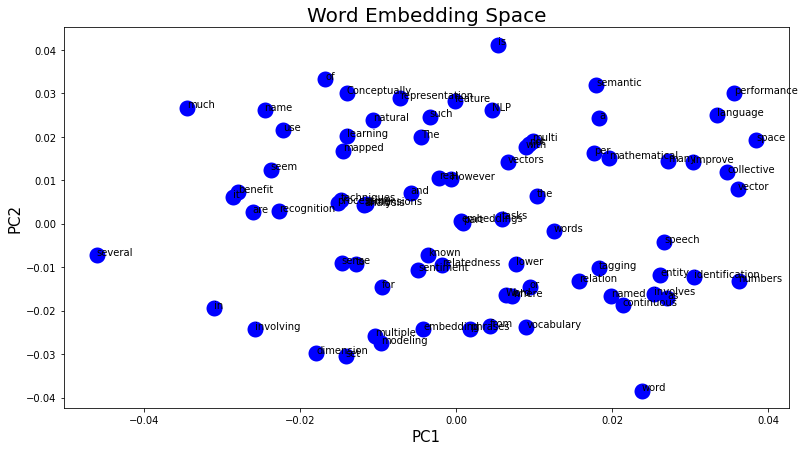

In [30]:
plt.figure(figsize=(13,7))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.key_to_index)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))